In [1]:
# import modules
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read csv file
file_path1 = os.path.join('HUD_Cities_Data.csv')
file_path2 = os.path.join('zillow_data','18_zillow_selected_cities_mean.csv')
file_path3 = os.path.join('HUD_Consol_Data.csv')
# place csv data into a DataFrame
hud_city_df = pd.read_csv(file_path1)
zillow_df = pd.read_csv(file_path2)
hud_consol_df = pd.read_csv(file_path3)

In [3]:
hud_consol_df.head()

,Year,CityState,State,County,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,Sheltered Homeless People in Families,Unsheltered Homeless People in Families,Chronically Homeless Individuals,Sheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals
0,2017,"Anchorage,AK",AK,Anchorage,1128,973,155,848,693,155,280,280,0,114,70,44
1,2017,"Alaska,AK",AK,Alaska,717,578,139,506,367,139,211,211,0,102,47,55
2,2017,"Birmingham,AL",AL,Birmingham,1092,875,217,932,715,217,160,160,0,89,28,61
3,2017,"Mobile,AL",AL,Mobile,606,341,265,426,179,247,180,162,18,65,9,56
4,2017,"Florence,AL",AL,Florence,155,133,22,155,133,22,0,0,0,24,10,14


In [4]:
# group data by year
hud_consol_df["Total Homeless"] = pd.to_numeric(hud_consol_df["Total Homeless"], errors='coerce')
hud_consolgroup_data = hud_consol_df.groupby("Year")["Total Homeless"].sum()
hud_consolgroup_data

Year
2007    647258.0
2008    639784.0
2009    630227.0
2010    637077.0
2011    623788.0
2012    621553.0
2013    590364.0
2014    576450.0
2015    564708.0
2016    549928.0
2017    553742.0
Name: Total Homeless, dtype: float64

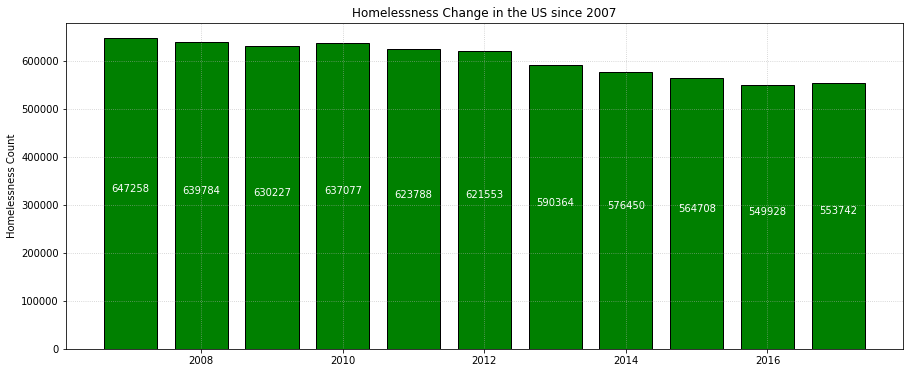

In [5]:
# Homelessness Change in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = hud_consolgroup_data.index
y = hud_consolgroup_data
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Change in the US since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("Homelessness_Summary.png")

# Show graph
plt.show()

In [6]:
hud_state_group = hud_consol_df.groupby(["State"])["Total Homeless"].sum()
hud_state_group.sort_values(ascending=False).head()

State
CA    1368563.0
NY     805535.0
FL     514287.0
TX     351281.0
WA     229496.0
Name: Total Homeless, dtype: float64

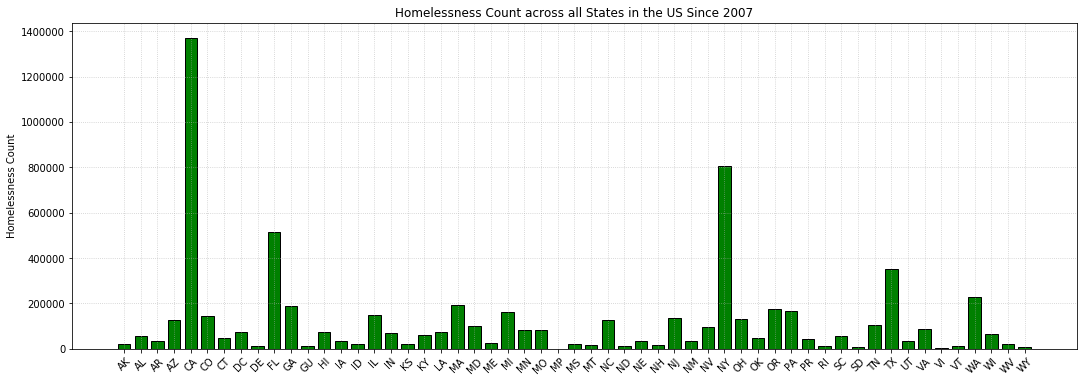

In [7]:
# Homelessness Count across all States in the US since 2007
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(18,6))
x = hud_state_group.index
y = hud_state_group
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('Homelessness Count across all States in the US Since 2007') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xticks(x, hud_state_group.index, rotation=45)
# Save the figure
plt.savefig("Homelessness_State_Summary.png")

# Show graph
plt.show()

In [8]:
hud_change_df = hud_consol_df[hud_consol_df["Year"].isin([2007,2017])]
hud_change_group = hud_change_df.groupby(["Year","State"])["Total Homeless"].sum()
hud_df = pd.DataFrame(hud_change_group)
hud_df = hud_df.reset_index()
hud_df = hud_df.pivot(index='State', columns='Year', values='Total Homeless')
hud_df.head()

Year,2007,2017
State,,
AK,1642.0,1845.0
AL,5452.0,3793.0
AR,3836.0,2467.0
AZ,14646.0,8947.0
CA,138986.0,134278.0


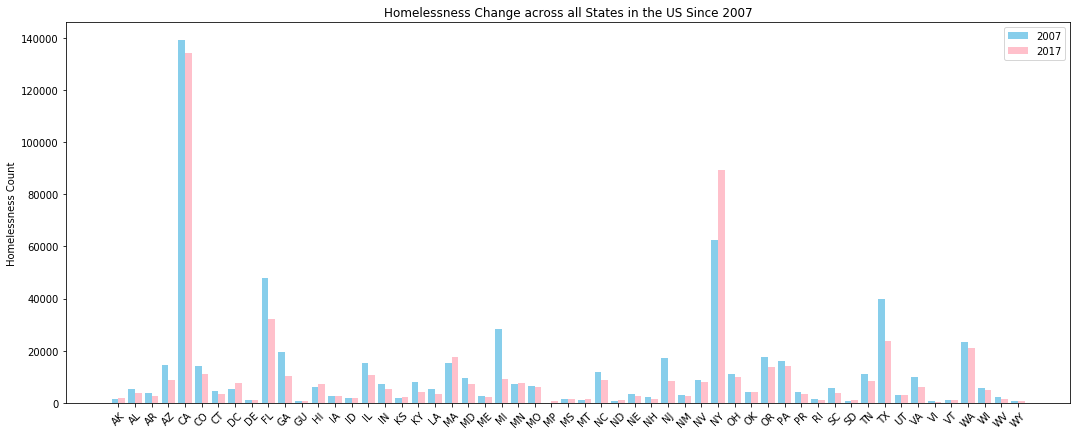

In [9]:
# Homelessness Change Summary
ind = np.arange(len(hud_df[2007]))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(ind - width/2, hud_df[2007], width, color='SkyBlue', label='2007')
rects2 = ax.bar(ind + width/2, hud_df[2017], width, color='Pink', label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homelessness Count')
ax.set_title('Homelessness Change across all States in the US Since 2007')
ax.set_xticks(ind)
ax.set_xticklabels((hud_df.index),rotation=45)
ax.legend()

# Save the figure
plt.savefig("Homelessness_Change_Summary.png")

# Show graph
plt.show()